# 7.10 Preprocess 49-00033 (Los Angeles, CA)

In [68]:
import matplotlib.pyplot as plt
import pandas

from cpe_help import Department

In [32]:
dept = Department('49-00033')
path = dept.tabular_input_dir / '49-00033_Arrests_2015.csv'
df = pandas.read_csv(path, low_memory=False, dtype={'INCIDENT_TIME': str}, skiprows=[1])

df.head().T

,0,1,2,3,4
INCIDENT_DATE,12/31/15 0:00,12/31/15 0:00,12/31/15 0:00,12/31/15 0:00,12/31/15 0:00
INCIDENT_TIME,2345,2330,2320,2319,2316
INCIDENT_UNIQUE_IDENTIFIER,4538991,4538996,4539142,4538947,4538938
LOCATION_DISTRICT,14,1,6,21,17
LOCATION_TYPE,Pacific,Central,Hollywood,Topanga,Devonshire
UNKNOWN_FIELD_TYPE,1435,101,646,2189,1739
SUBJECT_AGE,43,27,31,28,29
SUBJECT_GENDER,M,M,M,M,M
SUBJECT_RACE,H,W,W,H,B
UNKNOWN_FIELD_TYPE.1,22,4,16,22,16


In [53]:
df.shape

(126854, 18)

# Date and time

In [33]:
date = df['INCIDENT_DATE']
time = df['INCIDENT_TIME']

In [34]:
date.isnull().any()

False

In [35]:
time.isnull().mean()

0.00025225850189982183

In [36]:
date.value_counts().head()

1/9/15 0:00     579
3/6/15 0:00     556
2/13/15 0:00    544
2/27/15 0:00    541
1/29/15 0:00    538
Name: INCIDENT_DATE, dtype: int64

In [37]:
time.head()
# some times are exact

0    2345
1    2330
2    2320
3    2319
4    2316
Name: INCIDENT_TIME, dtype: object

In [38]:
time.value_counts().head()
# some times are not exact

1500    1326
1800    1285
1600    1271
2000    1254
1830    1188
Name: INCIDENT_TIME, dtype: int64

In [45]:
time[time == '110'].head()
# some times are ambiguous (is 110 equivalent to 1:10 or 11:0)

305     110
306     110
1196    110
1445    110
1446    110
Name: INCIDENT_TIME, dtype: object

In [48]:
time[time == '5'].head()
# and what does 5 even mean? 5:00?

320     5
669     5
943     5
1206    5
1463    5
Name: INCIDENT_TIME, dtype: object

In [49]:
date = df['INCIDENT_DATE']
# ignore time
datef = pandas.to_datetime(date, format='%m/%d/%y %H:%M')

In [50]:
datef.describe()

count                  126854
unique                    365
top       2015-01-09 00:00:00
freq                      579
first     2015-01-01 00:00:00
last      2015-12-31 00:00:00
Name: INCIDENT_DATE, dtype: object

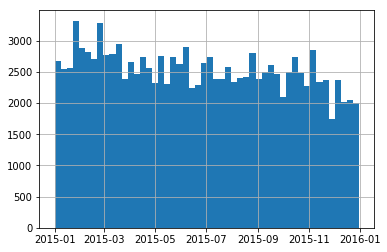

In [52]:
datef.hist(bins=50)

Perfect

# Location

In [55]:
location = df[[c for c in df if c.startswith('LOCATION')]]
location.head()

,LOCATION_DISTRICT,LOCATION_TYPE,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_LATITUDE,LOCATION_LONGITUDE
0,14,Pacific,3500 MCLAUGHLIN AV,34.0141,-118.4288
1,1,Central,900 FIGUEROA TR,34.0663,-118.2441
2,6,Hollywood,6300 HOLLYWOOD BL,34.1016,-118.3267
3,21,Topanga,VENTURA FY,34.1723,-118.5709
4,17,Devonshire,10800 WOODLEY AV,34.2667,-118.4848


In [56]:
location.isnull().mean()

LOCATION_DISTRICT                               0.0
LOCATION_TYPE                                   0.0
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION    0.0
LOCATION_LATITUDE                               0.0
LOCATION_LONGITUDE                              0.0
dtype: float64

In [58]:
location.mode()

,LOCATION_DISTRICT,LOCATION_TYPE,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_LATITUDE,LOCATION_LONGITUDE
0,1,Central,OCEAN FRONT,0.0,0.0


In [63]:
(df['LOCATION_LATITUDE'] == 0).mean()

0.05318712850994056

In [64]:
(df['LOCATION_LONGITUDE'] == 0).mean()

0.05318712850994056

In [65]:
((df['LOCATION_LATITUDE'] == 0) == (df['LOCATION_LONGITUDE'] == 0)).all()

True

In [67]:
lats = df['LOCATION_LATITUDE']
lons = df['LOCATION_LONGITUDE']
geocoded = df['LOCATION_LATITUDE'] != 0

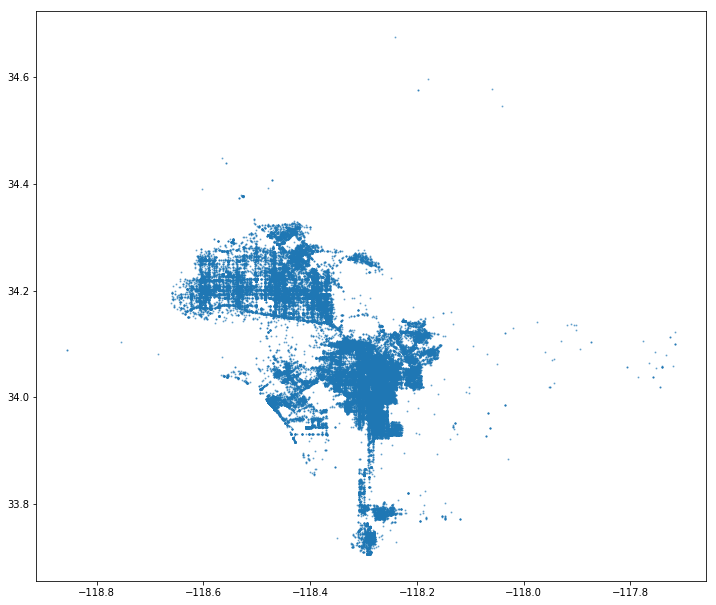

In [71]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_aspect('equal')

xs = lons[geocoded]
ys = lats[geocoded]
ax.scatter(xs, ys, s=1, alpha=0.5)

Nice! We can geocode missing points later if necessary (6747 entries)

In [74]:
# probably in the NAD83 CRS
dept.load_external_shapefile().crs

{'init': 'epsg:4269'}